In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

pacientes = pd.read_csv('data/covid.csv')

In [2]:
pacientes.head()

,fever,bodypain,age,runnynose,diffbreath,infected
0,99.329862,0,26,1,-1,0
1,98.115263,1,61,1,0,1
2,99.918088,1,13,0,-1,0
3,101.344456,1,55,1,0,1
4,100.056678,1,37,0,1,0


In [3]:
pacientes.columns
x = pacientes[['fever', 'bodypain', 'age', 'runnynose', 'diffbreath']].values
y = pacientes['infected'].values

In [4]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=2)
print(f'Entrenamiento: {x_train.shape}::{y_train.shape}')
print(f'Test: {x_test.shape}::{y_test.shape}')

Entrenamiento: (1539, 5)::(1539,)
Test: (460, 5)::(460,)


In [5]:
k = 2
neighbors = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)

In [6]:
prediction = neighbors.predict(x_test)
prediction[0:5]

array([0, 1, 1, 0, 0])

### Evaluacion del modelo predictivo
__Utilizamos la metrica llamada Indice de Jaccard__

In [7]:
print(f"Precision de entreno: {metrics.accuracy_score(y_train, neighbors.predict(x_train))}")
print(f"Precision de testeo: {metrics.accuracy_score(y_test, prediction)}")

Precision de entreno: 0.7569850552306693
Precision de testeo: 0.49130434782608695


### Verificacion de mejor valor para K

In [8]:
kn = 18
media_precision = np.zeros((kn - 1))
desviacion_estandar = np.zeros((kn - 1))

for n in range(1, kn):
    neighb = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    temp_prediction = neighb.predict(x_test)
    media_precision[n-1] = metrics.accuracy_score(y_test, temp_prediction)
    desviacion_estandar[n-1] = np.std(temp_prediction==y_test)/np.sqrt(temp_prediction.shape[0])
    
print(media_precision)
print(desviacion_estandar)

[0.5        0.49130435 0.52173913 0.5        0.53913043 0.50217391
 0.51521739 0.50869565 0.50869565 0.50434783 0.5173913  0.54565217
 0.54347826 0.54347826 0.56304348 0.55217391 0.52391304]
[0.02331262 0.02330909 0.02329058 0.02331262 0.02324112 0.0233124
 0.02330182 0.02330909 0.02330909 0.02331174 0.02329851 0.02321524
 0.02322431 0.02322431 0.02312657 0.02318535 0.02328594]


### Creamos una grafica para ver el mejor valor para K

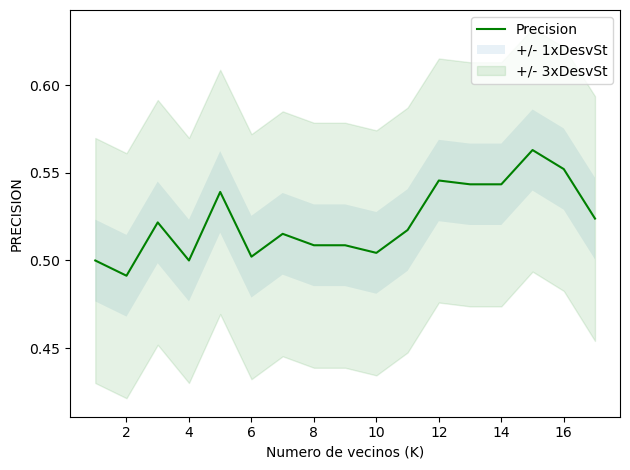

In [9]:
plt.plot(range(1, kn), media_precision, 'g')
plt.fill_between(range(1, kn), media_precision - 1 * desviacion_estandar, media_precision + 1 * desviacion_estandar, alpha=0.10)
plt.fill_between(range(1, kn), media_precision -3 * desviacion_estandar, media_precision + 3 * desviacion_estandar, alpha=0.10, color="green")
plt.legend(('Precision', '+/- 1xDesvSt', '+/- 3xDesvSt'))
plt.ylabel('PRECISION')
plt.xlabel('Numero de vecinos (K)')
plt.tight_layout()
plt.show()

In [10]:
print(f"La mejor precision fue de: {media_precision.max()}. Con K = {media_precision.argmax()+1}")

La mejor precision fue de: 0.5630434782608695. Con K = 15
